## Word Embeding Lookup in Tensorflow

* embedding_lookup function tf.nn.embedding_lookup(params, ids) retrieves rows of the params tensor. The behavior is similar to using indexing with arrays in numpy. E.g. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
params = np.random.random([1000, 8])  # 8-dimensional embeddings of 1000 words
ids = np.array([0, 5, 17, 33])
print(params[ids])

[[0.47683219 0.3707372  0.0595299  0.83992198 0.65760203 0.4200565
  0.82105034 0.8583928 ]
 [0.04700379 0.94656176 0.51662768 0.1597142  0.10274959 0.83603413
  0.15562806 0.49048239]
 [0.92462692 0.81844523 0.52353934 0.32676624 0.295074   0.55799232
  0.94743009 0.48464278]
 [0.90370975 0.41935616 0.80846635 0.03774119 0.29778106 0.04125977
  0.15568754 0.0874104 ]]


In [3]:
import tensorflow as tf

In [4]:
params = tf.constant(params)
ids = tf.constant([0,1,2,3])
print(tf.nn.embedding_lookup(params,ids))

tf.Tensor(
[[0.47683219 0.3707372  0.0595299  0.83992198 0.65760203 0.4200565
  0.82105034 0.8583928 ]
 [0.44939849 0.02426341 0.62101836 0.26578557 0.39666125 0.16318247
  0.13286787 0.75674309]
 [0.83822355 0.4619539  0.10470012 0.89927618 0.03011998 0.82567564
  0.62755961 0.76250667]
 [0.48969093 0.11536569 0.2422938  0.04647354 0.1829221  0.20245123
  0.3756768  0.10197988]], shape=(4, 8), dtype=float64)


## CNN Model on Cyber Bullying data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('Waseem_clean_data.csv')

In [7]:
data.head()

,Unnamed: 0,content,lable
0,0,someone is going home <hashtag>mkr ..that obvi...,0.0
1,1,they didn't even wash the chicken emoticon_sad...,0.0
2,2,<hashtag>mkr is honestly so fucking staged. th...,0.0
3,3,can someone smash that bottle of rose &amp; li...,0.0
4,4,will someone pls assist colin in the washing o...,0.0


In [8]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
data.isnull().any()

content    False
lable      False
dtype: bool

In [10]:
data.shape

(13763, 2)

In [11]:
data['lable'].value_counts()

0.0    9533
1.0    4230
Name: lable, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['lable'], test_size=0.10, random_state=30)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12386,), (1377,), (12386,), (1377,))

In [14]:
type(X_train)

pandas.core.series.Series

In [15]:
X_train.head()

5570        user i don't know. but i feel like user would.
5633     until twitter provides us with a way to filter...
9315     “here’s the deal cooking is cooking!” ouch! yo...
5937     today i am happy to announce the online abuse ...
11633    rt user i'm not sexist..but man women's basket...
Name: content, dtype: object

In [16]:
type(X_train)

pandas.core.series.Series

In [17]:
def fun_max_len(data):
    return max( len(t.split()) for t in data)

In [18]:
max_len = fun_max_len(X_train)
print('Train data max lengthed String: ', max_len)

Train data max lengthed String:  325


In [19]:
import tensorflow as tf

In [20]:
tf.__version__

'2.0.0'

In [21]:
text_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
text_tokenizer.fit_on_texts(X_train)

In [22]:
X_train_seq_data = text_tokenizer.texts_to_sequences(X_train)

In [23]:
print(X_train_seq_data[:2])

[[1, 6, 33, 690, 17, 6, 197, 34, 1, 3344], [264, 177, 3345, 171, 28, 5, 125, 4, 1880, 202, 1109, 57, 3345, 5, 1463, 8836, 4, 8837, 93, 16, 27, 691, 14, 257, 8838]]


In [24]:
X_train_seq_to_text = text_tokenizer.sequences_to_texts(X_train_seq_data)

In [25]:
print(X_train_seq_to_text[:2])

["user i don't know. but i feel like user would.", 'until twitter provides us with a way to filter new accounts or provides a higher barrier to entry these are just words that mean little.']


In [26]:
X_train_corpus = [x.split() for x in X_train_seq_to_text]

In [27]:
print(X_train_corpus[:2])

[['user', 'i', "don't", 'know.', 'but', 'i', 'feel', 'like', 'user', 'would.'], ['until', 'twitter', 'provides', 'us', 'with', 'a', 'way', 'to', 'filter', 'new', 'accounts', 'or', 'provides', 'a', 'higher', 'barrier', 'to', 'entry', 'these', 'are', 'just', 'words', 'that', 'mean', 'little.']]


In [28]:
embedding_dim=150

In [29]:
import gensim
import pickle

#wv_model = gensim.models.Word2Vec(size=embedding_dim, window=3, min_count=1, sg=1, workers=10)
#wv_model.build_vocab(sentences=X_train_corpus)  # prepare the model vocabulary
#wv_model.train(sentences=X_train_corpus, total_examples=len(X_train_corpus), epochs=100)

#filename = 'waseem_train_word2vec_UNK_model.sav'
#pickle.dump(wv_model, open(filename, 'wb'))

In [30]:
filename = 'waseem_train_word2vec_UNK_model_surace_pro3.sav'
wv_model = pickle.load(open(filename, 'rb'))

In [31]:
len(wv_model.wv.vocab)

22354

In [32]:
vector = wv_model.wv["given"] 
vector.dtype

dtype('float32')

In [33]:
#text_tokenizer.word_index

In [34]:
#text_tokenizer.index_word

In [35]:
vocab_size = len(text_tokenizer.word_index)+1  
print('vocab_size : ', vocab_size)

vocab_size :  22366


In [36]:
BATCH_SIZE = 64

In [37]:
def generate_sent_word2vec_array(lst_sent):
    word_array = np.zeros((max_len, embedding_dim))
    for i, word in enumerate(lst_sent):
        if word in wv_model.wv.vocab:
            word_array[i] = wv_model.wv[word]
        else:
            word_array[i] = np.zeros(embedding_dim)
    return word_array

In [38]:
def split_batch(X, y):
    n_batches = len(y) // BATCH_SIZE
       
    for batch_idx in range(n_batches):
        y_batch_labels = np.array(y[batch_idx*BATCH_SIZE : batch_idx*BATCH_SIZE + BATCH_SIZE])
        
        X_batch_sents = X[batch_idx*BATCH_SIZE : batch_idx*BATCH_SIZE + BATCH_SIZE]
        X_batch = None
        for lst_sent in X_batch_sents:
            send_2d_arr = generate_sent_word2vec_array(lst_sent)
            if X_batch is None:
                X_batch = np.array([send_2d_arr])
            else:
                X_batch = np.append(X_batch, values=[send_2d_arr], axis=0)
                
                
        yield X_batch, y_batch_labels

In [39]:
'''cnt = 0
for x, y in split_batch(X_text_corpus, y_test):
    if cnt > 0:
        break;
    print(x.shape, x.dtype)
    print(y.shape, y.dtype)
    cnt = cnt +1'''

'cnt = 0\nfor x, y in split_batch(X_text_corpus, y_test):\n    if cnt > 0:\n        break;\n    print(x.shape, x.dtype)\n    print(y.shape, y.dtype)\n    cnt = cnt +1'

* https://www.tensorflow.org/tutorials/text/word_embeddings
* https://www.tensorflow.org/tutorials/text/text_classification_rnn

In [40]:
print('Test data max lengthed String: ', fun_max_len(X_test))

Test data max lengthed String:  271


In [41]:
X_test_seq_data = text_tokenizer.texts_to_sequences(X_test)
#X_test_seq_data = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq_data, padding='post', maxlen=max_len)

In [42]:
print(X_test_seq_data[:2])

[[23, 10, 1286, 4, 24, 5, 155, 186, 176, 15, 5, 1167, 9, 1209, 233, 5, 4996, 3], [7, 1, 37, 29, 47, 60, 6, 161, 22, 49, 2286, 70, 9, 3, 22, 16, 32, 2699, 31, 15, 1691, 12, 16, 27, 3447]]


In [43]:
X_test_seq_to_text = text_tokenizer.sequences_to_texts(X_test_seq_data)

In [44]:
print(X_test_seq_to_text[:2])

['this is supposed to be a fucking cooking show not a bunch of walking down a runway <hashtag>mkr', "rt user if kat &amp; andre i hope they get kicked out of <hashtag>mkr they are so horrible. it's not editing you are just horrid."]


In [45]:
X_text_corpus = [x.split() for x in X_test_seq_to_text]

In [46]:
print(X_text_corpus[:2])

[['this', 'is', 'supposed', 'to', 'be', 'a', 'fucking', 'cooking', 'show', 'not', 'a', 'bunch', 'of', 'walking', 'down', 'a', 'runway', '<hashtag>mkr'], ['rt', 'user', 'if', 'kat', '&amp;', 'andre', 'i', 'hope', 'they', 'get', 'kicked', 'out', 'of', '<hashtag>mkr', 'they', 'are', 'so', 'horrible.', "it's", 'not', 'editing', 'you', 'are', 'just', 'horrid.']]


In [47]:
TRAIN_BUFFER_SIZE = len(X_train)
print('TRAIN_BUFFER_SIZE : ', TRAIN_BUFFER_SIZE)
TEST_BUFFER_SIZE = len(X_test)
print('TEST_BUFFER_SIZE : ', TEST_BUFFER_SIZE)

TRAIN_BUFFER_SIZE :  12386
TEST_BUFFER_SIZE :  1377


In [48]:
#train_dataset = tf.data.Dataset.from_generator(lambda : split_batch(X_train_corpus, y_train) ,
#                               output_types=(tf.float32, tf.int32), 
#                               output_shapes=( tf.TensorShape([BATCH_SIZE, max_len, embedding_dim]), tf.TensorShape([None]) )  )

In [49]:
#list(train_dataset.take(4).as_numpy_iterator())[0][:]

In [50]:
train_dataset = tf.data.Dataset.from_generator(lambda : split_batch(X_train_corpus, y_train),
                               output_types=(tf.float32, tf.int32), 
                               output_shapes=( tf.TensorShape([BATCH_SIZE, max_len, embedding_dim]), tf.TensorShape([None]) )  )

test_dataset = tf.data.Dataset.from_generator(lambda : split_batch(X_text_corpus, y_test),
                               output_types=(tf.float32, tf.int32), 
                               output_shapes=( tf.TensorShape([BATCH_SIZE, max_len, embedding_dim]), tf.TensorShape([None]) )  )

In [51]:
y_train.value_counts()

0.0    8589
1.0    3797
Name: lable, dtype: int64

In [52]:
model = tf.keras.Sequential([
    
    #tf.keras.layers.Embedding(vocab_size, embedding_dim),

    tf.keras.layers.Conv1D(kernel_size=9, filters=16, padding='same', activation='relu', input_shape=(max_len,embedding_dim)),
    tf.keras.layers.MaxPool1D(pool_size=5, strides=1),
    tf.keras.layers.Conv1D(kernel_size=7, filters=8, padding='same', activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5, strides=1),    
    tf.keras.layers.Conv1D(kernel_size=5, filters=4, padding='same', activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5, strides=1),    
  
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.999)),
    tf.keras.layers.Dropout(.6),

    tf.keras.layers.Dense(1, activation='sigmoid')


])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 325, 16)           21616     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 321, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 321, 8)            904       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 317, 8)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 317, 4)            164       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 313, 4)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1252)              0

In [53]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [54]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_accuracy')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("5_1_waseem_deep_gensim_wordvecs_v5.h5", save_best_only=True)

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
              callbacks=[checkpoint_callback, early_stopping_callback])

Epoch 1/10
193/193 [==============================] - 443s 2s/step - loss: 2.2291 - accuracy: 0.6932 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
193/193 [==============================] - 426s 2s/step - loss: 0.5698 - accuracy: 0.7224 - val_loss: 0.5270 - val_accuracy: 0.7530
Epoch 3/10
193/193 [==============================] - 280s 1s/step - loss: 0.5357 - accuracy: 0.7331 - val_loss: 0.5339 - val_accuracy: 0.7433
Epoch 4/10
193/193 [==============================] - 239s 1s/step - loss: 0.5061 - accuracy: 0.7468 - val_loss: 0.5199 - val_accuracy: 0.7656
Epoch 5/10
193/193 [==============================] - 237s 1s/step - loss: 0.4900 - accuracy: 0.7465 - val_loss: 0.5305 - val_accuracy: 0.7686
Epoch 6/10
193/193 [==============================] - 220s 1s/step - loss: 0.4512 - accuracy: 0.7558 - val_loss: 0.6520 - val_accuracy: 0.7582
Epoch 7/10
193/193 [==============================] - 184s 954ms/step - loss: 0.4315 - accuracy: 0.7613 - val_loss: 0.6254 - val_accur

In [55]:
model.predict(test_dataset)

array([[0.05845416],
       [0.12475255],
       [0.20287004],
       ...,
       [0.5134787 ],
       [0.6369705 ],
       [0.42394423]], dtype=float32)

In [56]:
sample_text_x, sample_test_y = next(iter(test_dataset))

In [57]:
test_pred = model.predict_classes(sample_text_x)

In [58]:
sample_text_x.shape

TensorShape([64, 325, 150])

In [59]:
test_pred.shape

(64, 1)

In [60]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

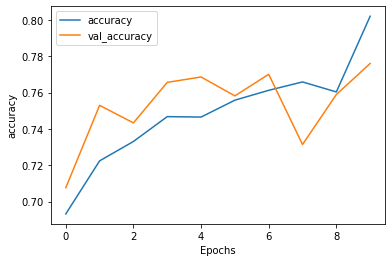

In [61]:
plot_graphs(history, 'accuracy')

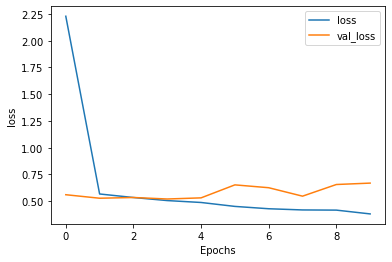

In [62]:
plot_graphs(history, 'loss')

In [63]:
#model.save("5.1_waseem_deep_gensim_wordvecs_v3.h5")

In [64]:
import pickle
hist_file = '5.1_waseem_deep_gensim_wordvecs_v3_history.sav'
pickle.dump(history, open(hist_file, 'wb'))

TypeError: can't pickle _thread._local objects

In [ ]:
text_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
fit_text = ["The earth is an awesome place live"]
text_tokenizer.fit_on_texts(fit_text)

#fit_on_texts fits on sentences when list of sentences is passed to fit_on_texts() function. 
#ie - fit_on_texts( [ sent1, sent2, sent3,....sentN ] )

#Similarly, list of sentences/single sentence in a list must be passed into texts_to_sequences.
test_text1 = "The earth is an great place live"
test_text2 = "The is my program"
sequences = text_tokenizer.texts_to_sequences([test_text1, test_text2])

print('sequences : ',sequences,'\n')

print('word_index : ',text_tokenizer.word_index)
#texts_to_sequences() returns list of list. ie - [ [] ]

In [ ]:
lst = [1] 
lst * 3

In [ ]:
import itertools

def gen():
    for i in itertools.count(1):
        yield (np.array([ [i, i, i], [i, i, i] ]) , [1] * i)

dataset = tf.data.Dataset.from_generator(
     gen,
     (tf.int64, tf.int64),
     (tf.TensorShape([2, 3]), tf.TensorShape([None])) )

list(dataset.take(4).as_numpy_iterator())